simtext

In [1]:
from simtext import similarity

text1 = '在宏观经济背景下，为继续优化贷款结构，重点发展可以抵抗经济周期不良的贷款'
text2 = '在宏观经济背景下，为继续优化贷款结构，重点发展可三年专业化、集约化、综合金融+物联网金融四大金融特色的基础上'

sim = similarity()
res = sim.compute(text1, text2)
print(res)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9w/c36sxh3j5qs4s1p98r4dcb2m0000gn/T/jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built successfully.


{'Sim_Cosine': 0.560112033611204, 'Sim_Jaccard': 0.38095238095238093, 'Sim_MinEdit': 29, 'Sim_Simple': 0.9889595182335229}


In [2]:
A = 'We expect demand to increase.'
B = 'We expect worldwide demand to increase.'
C = 'We expect weakness in sales'

sim = similarity()
AB = sim.compute(A, B)
AC = sim.compute(A, C)

print(AB)
print(AC)

{'Sim_Cosine': 0.912870929175277, 'Sim_Jaccard': 0.8333333333333334, 'Sim_MinEdit': 2, 'Sim_Simple': 0.9545454545454546}
{'Sim_Cosine': 0.39999999999999997, 'Sim_Jaccard': 0.25, 'Sim_MinEdit': 4, 'Sim_Simple': 0.9315789473684211}


方法：使用difflib中的SequenceMatcher

s=difflib.SequenceMatcher(isjunk=None,a,b, autojunk=True) ：构造函数，主要创建任何类型序列的比较对象。isjunk是关键字参数，主要设置过滤函数，如想丢掉a和b比较序列里特定的字符，就可以设置相应的函数
s.get_opcodes()函数每执行一次返回5个元素的元组，元组描述了a和b比较序列的相同不同处。5个元素的元组表示为(tag, i1, i2, j1, j2)，其中tag表示动作，i1表示序列a的开始位置，i2表示序列a的结束位置，j1表示序列b的开始位置，j2表示序列b的结束位置。
tag表示的字符串有： 
replace ：表示a[i1 : i2]将要被b[j1 : j2]替换。
delete ： 表示a[i1 : i2]将要被删除。
Insert ： 表示b[j1 : j2]将被插入到a[i1 : i1]地方。
equal  ：表示a[i1 : i2] == b[j1 : j2]相同。
相似度s.ratio(), 相似度的计算公式为2*m/t,其中m表示a,b相同的字符长度， t表示a,b两个字符串总共的长度
————————————————
版权声明：本文为CSDN博主「Jingle-stu」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/qq_40006760/article/details/119008560

In [21]:
from difflib import SequenceMatcher
a = "EM"
b = "ME"
s = SequenceMatcher(None, a, b)
print(s.ratio())

'''
for tag, i1, i2, j1, j2 in s.get_opcodes():
    if tag != 'equal':
        print("%7s a[%d:%d] (%s) b[%d:%d] (%s)" % (tag, i1, i2, a[i1:i2], j1, j2, b[j1:j2]))
'''

0.5


'\nfor tag, i1, i2, j1, j2 in s.get_opcodes():\n    if tag != \'equal\':\n        print("%7s a[%d:%d] (%s) b[%d:%d] (%s)" % (tag, i1, i2, a[i1:i2], j1, j2, b[j1:j2]))\n'

In [23]:
import difflib
string1 = "I love to eat apple."
string2 = "I do not like to eat pineapple."

temp = difflib.SequenceMatcher(None,string1 ,string2)

print(temp.get_matching_blocks())
print('Similarity Score: ',temp.ratio())

[Match(a=0, b=0, size=2), Match(a=2, b=9, size=1), Match(a=5, b=12, size=9), Match(a=14, b=25, size=6), Match(a=20, b=31, size=0)]
Similarity Score:  0.7058823529411765


In [4]:
import math

class Vector:
    """笛卡尔坐标系向量"""
    def __init__(self, a):
        """构造函数：切片拷贝列表参数a到对象实例变量_coords"""
        self._coords = a[:]
        self._n = len(a)
    def __getitem__(self, i):
        """返回第i个元素，即第i维坐标"""
        return self._coords[i]
    def __add__(self, other):
        """返回2个向量之和"""
        result = []
        for i in range(self._n):
            result.append(self._coords[i] + other._coords[i])
        return Vector(result)
    def __sub__(self, other):
        """返回2个向量之差"""
        result = []
        for i in range(self._n):
            result.append(self._coords[i] - other._coords[i])
        return Vector(result)
    def scale(self, n):
        """返回向量与数值的乘积（标量积）"""
        result = []
        for i in range(self._n):
            result.append(self._coords[i] * n)
        return Vector(result)
    def dot(self, other):
        """返回2向量的内积（点积）"""
        result = 0
        for i in range(self._n):
            result += self._coords[i] * other._coords[i]
        return result
    def __abs__(self):
        """返回向量的模"""
        return math.sqrt(self.dot(self))
    def direction(self):
        """返回向量的单位向量"""
        return self.scale(1.0 / abs(self))
    def __str__(self):
        """返回向量的字符串表示"""
        return str(self._coords)
    def __len__(self):
        """返回向量的维度"""
        return self._n

# 测试代码
def main():
    xCoords = [2.0, 2.0, 2.0]
    yCoords = [5.0, 5.0, 0.0]
    x = Vector(xCoords)
    y = Vector(yCoords)
    print('x = {}, y = {}'.format(x, y))
    print()
    print('x + y = {}'.format(x + y))
    print()
    print('10x = {}'.format(x.scale(10.0)))
    print()
    print('|x| = {}'.format(abs(x)))
    print()
    print('<x, y> = {}'.format(x.dot(y)))
    print()
    print('|x - y| = {}'.format(abs(x-y)))

if __name__ == '__main__':
    main()


x = [2.0, 2.0, 2.0], y = [5.0, 5.0, 0.0]

x + y = [7.0, 7.0, 2.0]

10x = [20.0, 20.0, 20.0]

|x| = 3.4641016151377544

<x, y> = 20.0

|x - y| = 4.69041575982343


In [5]:
from gensim import corpora
from gensim import models
from gensim import similarities
#from corpora.corpus import Corpus
# 1 分词
# 1.1 历史比较文档的分词
all_location_list = []
for doc in location_list:
    doc_list = [word for word in jieba.cut_for_search(doc)]
    # doc_list = [word for word in jieba.cut(doc)]
    all_location_list.append(doc_list)

# 1.2 测试文档的分词

doc_test="A市A市经济学院体育学院"
doc_test_list = [word for word in jieba.cut_for_search(doc_test)]
# doc_test_list = [word for word in jieba.cut(doc_test)]

# 2 制作语料库
# 2.1 获取词袋
dictionary = corpora.Dictionary(all_location_list)

# 2.2 制作语料库
# 历史文档的二元组向量转换
corpus = [dictionary.doc2bow(doc) for doc in all_location_list]
# 测试文档的二元组向量转换
doc_test_vec = dictionary.doc2bow(doc_test_list)

# 3 相似度分析
# 3.1 使用TF-IDF模型对语料库建模
tfidf = models.TfidfModel(corpus)
# 获取测试文档中，每个词的TF-IDF值
tfidf[doc_test_vec]

# 3.2 对每个目标文档，分析测试文档的相似度
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary.keys()))
sim = index[tfidf[doc_test_vec]]

# 根3.3 据相似度排序
sorted(enumerate(sim), key=lambda item: -item[1])


NameError: name 'location_list' is not defined

In [6]:
import string
from io import StringIO

from math import log
import numpy as np
KLD=(lambda p,q:sum([_p * log(_p,2)-_p * log(_q,2) for (_p,_q) in zip(p,q)]))
  
def JSD_core(p,q):
    p,q=zip(*filter(lambda(x,y):x!=0 or y!=0, zip(p,q))) #去掉二者都是0的概率值
    M = [0.5*(_p+_q) for _p,_q in zip(p,q)]
    p=p+np.spacing(1)
    q=q+np.spacing(1)
    M=M+np.spacing(1)
    return 0.5*KLD(p,M)+0.5*KLD(q,M)
 

reg=lambda x:[x.count(i) for i in string.ascii_lowercase]  #频数分布
rate=lambda y:[round(i*1.0/sum(reg(y)),4) for i in reg(y)]  #概率分布
#s1 = data4_message[1]
#s2 = data4_answer[1]
s1='ahaebssa'
s2='awohwsess'
print (JSD_core(rate(s1),rate(s2)))


SyntaxError: invalid syntax (3915448911.py, line 9)

In [7]:
import numpy as np
import scipy.stats
p=np.asarray([0.65,0.25,0.07,0.03])
q=np.array([0.6,0.25,0.1,0.05])
q2=np.array([0.1,0.2,0.3,0.4])
def JS_divergence(p,q):
    M=(p+q)/2
    return 0.5*scipy.stats.entropy(p, M)+0.5*scipy.stats.entropy(q, M)
print(JS_divergence(p,q))  # 0.003093977084273652
print(JS_divergence(p,q2)) # 0.24719159952098618
print(JS_divergence(p,p)) # 0.0



0.003093977084273652
0.24719159952098618
0.0


In [10]:
p+q

array([1.25, 0.5 , 0.17, 0.08])

In [9]:
q

array([0.6 , 0.25, 0.1 , 0.05])

In [ ]:
import pandas as pd


dfdf=pd.Dataframe()

In [1]:
import PyPDF2
import pandas as pd

#philips
philips_pdf=open('phillips_privacy.pdf',mode='rb')
philips_privacy=PyPDF2.PdfFileReader(philips_pdf)
philips=[]
dicphilips=pd.DataFrame(columns=['pages','contents'])

for i in range(philips_privacy.numPages):
    page=philips_privacy.getPage(i)
    text1=page.extract_text()
    text1.replace('\n',' ').replace('\r',' ')
    philips.append(text1)
    dicphilips.loc[i]=[i+1,text1]
    

#google
google_pdf=open('google_privacy.pdf',mode='rb')
google_privacy=PyPDF2.PdfFileReader(google_pdf)

google=[]
dicgoogle=pd.DataFrame(columns=['pages','contents'])

for i in range(google_privacy.numPages):
    page=google_privacy.getPage(i)
    text1=page.extract_text()
    text1.replace('\n',' ').replace('\r',' ')
    google.append(text1)
    dicgoogle.loc[i]=[i+1,text1]
    

#huawei
huawei_txt=open('Huawei_privacy.txt',encoding='utf-8')
huawei=[]
for line in huawei_txt:
    huawei.append(line.strip())


#irobot
irobot_txt=open('iRobot_privacy.txt',encoding='utf-8')
irobot=[]
for line in irobot_txt:
    irobot.append(line.strip())

    
#TCL
TCL_cookies_txt=open('TCL_cookies_policy.txt',encoding='utf-8')
TCL_privacy_txt=open('TCL_Privacy_notice.txt',encoding='utf-8')
TCL_terms_txt=open('TCL_terms_and_conditions.txt',encoding='utf-8')

TCL_cookies=[]
TCL_privacy=[]
TCL_terms=[]

for line in TCL_cookies_txt:
    TCL_cookies.append(line.strip())
    
for line in TCL_privacy_txt:
    TCL_privacy.append(line.strip())
    
for line in TCL_terms_txt:
    TCL_terms.append(line.strip())
    
    
#xiaomi
xiaomi_txt=open('Xiaomi_privacy.txt',encoding='utf-8')
xiaomi=[]
for line in xiaomi_txt:
    xiaomi.append(line.strip())

    
#DPA
DPA_2018=open('DPA_2018.pdf',mode='rb')
DPA=PyPDF2.PdfFileReader(DPA_2018)

dpa=[]
dicdpa=pd.DataFrame(columns=['pages','contents'])

for i in range(DPA.numPages):
    page=DPA.getPage(i)
    text1=page.extract_text()
    text1.replace('\n',' ').replace('\r',' ')
    dpa.append(text1)
    dicdpa.loc[i]=[i+1,text1]

In [2]:
import difflib
import pandas as pd

#DPA&GOOGLE
dpa_google_dict={}
dpa_google_list=[]
for i in range(len(dpa)):
    for j in range(len(google)):
        string1 = dpa[i]
        string2 = google[j]
        temp = difflib.SequenceMatcher(None,string1,string2)
        dpa_google_dict.update({(string1,string2):temp.ratio()})
        dpa_google_list.append(['dpa'+str(i)+'google'+str(j),temp.ratio()])

#print(temp.get_matching_blocks())
#print('Similarity Score: ',temp.ratio())

In [3]:
dpa_google_list_sorted=sorted(dpa_google_list,key=lambda x:x[1],reverse=True)
dpa_google_list_sorted[:5]

[['dpa129google28', 0.035346097201767304],
 ['dpa63google12', 0.030664395229982964],
 ['dpa50google12', 0.02975929978118162],
 ['dpa90google12', 0.028834790829591114],
 ['dpa224google19', 0.028622540250447227]]

In [4]:
#DPA&XIAOMI
dpa_xiaomi_dict={}
dpa_xiaomi_list=[]
for i in range(len(dpa)):
    for j in range(len(xiaomi)):
        string1 = dpa[i]
        string2 = xiaomi[j]
        temp = difflib.SequenceMatcher(None,string1,string2)
        dpa_xiaomi_dict.update({(string1,string2):temp.ratio()})
        dpa_xiaomi_list.append(['dpa'+str(i)+'xiaomi'+str(j),temp.ratio()])
        
dpa_xiaomi_list_sorted=sorted(dpa_xiaomi_list,key=lambda x:x[1],reverse=True)
dpa_xiaomi_list_sorted[:5]

[['dpa129xiaomi65', 0.19727177334732424],
 ['dpa129xiaomi78', 0.19088937093275488],
 ['dpa129xiaomi114', 0.19027484143763213],
 ['dpa129xiaomi143', 0.16247139588100687],
 ['dpa129xiaomi179', 0.1600877192982456]]

In [5]:
#DPA&PHILIPS
dpa_philips_dict={}
dpa_philips_list=[]
for i in range(len(dpa)):
    for j in range(len(philips)):
        string1 = dpa[i]
        string2 = philips[j]
        temp = difflib.SequenceMatcher(None,string1,string2)
        dpa_philips_dict.update({(string1,string2):temp.ratio()})
        dpa_philips_list.append(['dpa'+str(i)+'philips'+str(j),temp.ratio()])
        
dpa_philips_list_sorted=sorted(dpa_philips_list,key=lambda x:x[1],reverse=True)
dpa_philips_list_sorted[:5]

[['dpa129philips3', 0.19169329073482427],
 ['dpa129philips2', 0.1810436634717785],
 ['dpa129philips7', 0.12658227848101267],
 ['dpa124philips3', 0.11687602403058438],
 ['dpa48philips3', 0.11294526498696786]]

In [6]:
#DPA&IROBOT
dpa_irobot_dict={}
dpa_irobot_list=[]
for i in range(len(dpa)):
    for j in range(len(irobot)):
        string1 = dpa[i]
        string2 = irobot[j]
        temp = difflib.SequenceMatcher(None,string1,string2)
        dpa_irobot_dict.update({(string1,string2):temp.ratio()})
        dpa_irobot_list.append(['dpa'+str(i)+'irobot'+str(j),temp.ratio()])
        
dpa_irobot_list_sorted=sorted(dpa_irobot_list,key=lambda x:x[1],reverse=True)
dpa_irobot_list_sorted[:5]

[['dpa129irobot7', 0.16396979503775622],
 ['dpa129irobot95', 0.14418604651162792],
 ['dpa129irobot130', 0.1372328458942632],
 ['dpa129irobot5', 0.12421052631578948],
 ['dpa315irobot5', 0.11954765751211632]]

In [10]:
#DPA&HUAWEI
dpa_huawei_list=[]
for i in range(len(dpa)):
    for j in range(len(huawei)):
        string1 = dpa[i]
        string2 = huawei[j]
        temp = difflib.SequenceMatcher(None,string1,string2)
        dpa_huawei_list.append(['dpa'+str(i)+'huawei'+str(j),temp.ratio()])
        
dpa_huawei_list_sorted=sorted(dpa_huawei_list,key=lambda x:x[1],reverse=True)
dpa_huawei_list_sorted[:5]

[['dpa129huawei198', 0.20335429769392033],
 ['dpa129huawei132', 0.1925133689839572],
 ['dpa129huawei140', 0.17418677859391396],
 ['dpa129huawei82', 0.16952789699570817],
 ['dpa129huawei92', 0.15026455026455027]]

In [8]:
#DPA&TCL
tcl=TCL_cookies+TCL_privacy+TCL_terms
dpa_tcl_dict={}
dpa_tcl_list=[]
for i in range(len(dpa)):
    for j in range(len(tcl)):
        string1 = dpa[i]
        string2 = tcl[j]
        temp = difflib.SequenceMatcher(None,string1,string2)
        dpa_tcl_dict.update({(string1,string2):temp.ratio()})
        dpa_tcl_list.append(['dpa'+str(i)+'tcl'+str(j),temp.ratio()])
        
dpa_tcl_list_sorted=sorted(dpa_tcl_list,key=lambda x:x[1],reverse=True)
dpa_tcl_list_sorted[:5]

[['dpa129tcl479', 0.2052910052910053],
 ['dpa129tcl729', 0.20490928495197439],
 ['dpa129tcl983', 0.19768664563617244],
 ['dpa129tcl389', 0.1951219512195122],
 ['dpa129tcl42', 0.1943231441048035]]

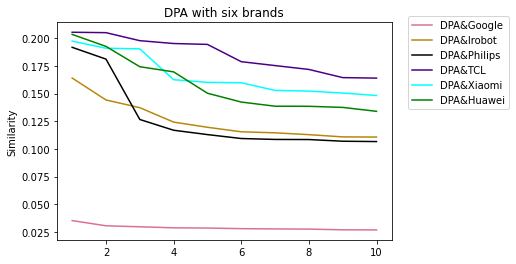

In [11]:
import numpy as np
import matplotlib.pyplot as plt

dpa_google_line=dpa_google_list_sorted[:10]
dpa_irobot_line=dpa_irobot_list_sorted[:10]
dpa_philips_line=dpa_philips_list_sorted[:10]
dpa_tcl_line=dpa_tcl_list_sorted[:10]
dpa_xiaomi_line=dpa_xiaomi_list_sorted[:10]
dpa_huawei_line=dpa_huawei_list_sorted[:10]

y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
y6=[]

for i in range(10):
    y1.append(dpa_google_line[i][1])
    y2.append(dpa_irobot_line[i][1])
    y3.append(dpa_philips_line[i][1])
    y4.append(dpa_tcl_line[i][1])
    y5.append(dpa_xiaomi_line[i][1])
    y6.append(dpa_huawei_line[i][1])

x=np.arange(1,11,1)

l1=plt.plot(x,y1,color='palevioletred',label='DPA&Google')
l2=plt.plot(x,y2,color='darkgoldenrod',label='DPA&Irobot')
l3=plt.plot(x,y3,color='black',label='DPA&Philips')
l4=plt.plot(x,y4,color='indigo',label='DPA&TCL')
l5=plt.plot(x,y5,color='cyan',label='DPA&Xiaomi')
l6=plt.plot(x,y6,color='green',label='DPA&Huawei')

plt.title('DPA with six brands')

plt.ylabel('Similarity')
plt.legend(bbox_to_anchor=(1.05, 0.6), loc=3, borderaxespad=0)
plt.show()